<a href="https://colab.research.google.com/github/idxyiz/nifty50-Stock/blob/main/StockPricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Import dataSet

In [14]:
url = "https://raw.githubusercontent.com/idxyiz/nifty50-Stock/main/ZEEL.csv"

df = pd.read_csv(url)

In [15]:
#print dataset
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ZEETELE,EQ,1092.55,1175.00,1179.95,1160.00,1179.95,1179.95,1177.03,1261391,1.484690e+14,NaN,NaN,NaN
1,2000-01-04,ZEETELE,EQ,1179.95,1220.00,1274.35,1183.10,1274.35,1260.65,1228.02,4616547,5.669220e+14,NaN,NaN,NaN
2,2000-01-05,ZEETELE,EQ,1260.65,1160.55,1317.70,1159.80,1190.95,1176.55,1238.35,8763127,1.085178e+15,NaN,NaN,NaN
3,2000-01-06,ZEETELE,EQ,1176.55,1195.00,1200.00,1095.00,1106.00,1115.45,1135.04,5164020,5.861353e+14,NaN,NaN,NaN
4,2000-01-07,ZEETELE,EQ,1115.45,1097.10,1097.10,1026.25,1026.25,1026.25,1029.94,755129,7.777374e+13,NaN,NaN,NaN


In [16]:
#Dataset shape
df.shape

(5306, 15)

Visualize close price

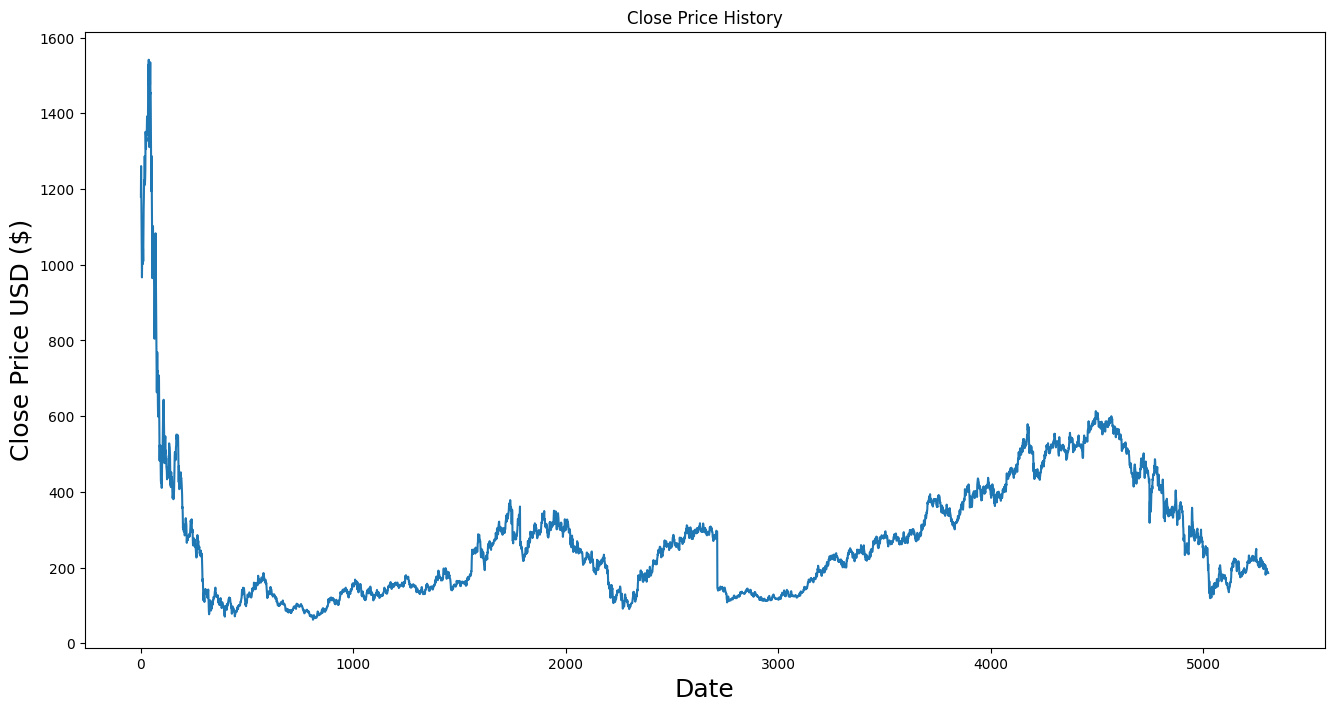

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [18]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8) #0.8 means we have 80:20 ratio for train/test.
training_data_len

#scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.75547519],
       [0.81002433],
       [0.75317696],
       ...,
       [0.08571042],
       [0.08398675],
       [0.0833446 ]])

#Create training data

In [19]:
train_data = scaled_data[0:training_data_len, :]
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Creating testing data#

In [20]:
test_data = scaled_data[training_data_len - 60 : , :]

X_test = []
y_test = dataset[training_data_len : , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Build the LSTM model#


In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model#

In [23]:
model.compile(optimizer='adam', loss='mse')

Train the model

In [24]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train, y_train, batch_size=1, epochs=10,validation_split=0.2)

Epoch 1/10
3348/3348 [==============================] - 60s 17ms/step - loss: 6.0275e-04 - val_loss: 0.0064
Epoch 2/10
3348/3348 [==============================] - 56s 17ms/step - loss: 2.7962e-04 - val_loss: 9.5434e-05
Epoch 3/10
3348/3348 [==============================] - 56s 17ms/step - loss: 1.4212e-04 - val_loss: 3.3348e-05
Epoch 4/10
3348/3348 [==============================] - 56s 17ms/step - loss: 1.1284e-04 - val_loss: 8.4110e-05
Epoch 5/10
3348/3348 [==============================] - 56s 17ms/step - loss: 1.1640e-04 - val_loss: 3.8910e-04
Epoch 6/10
3348/3348 [==============================] - 57s 17ms/step - loss: 1.1158e-04 - val_loss: 6.4759e-05
Epoch 7/10
3348/3348 [==============================] - 57s 17ms/step - loss: 1.0204e-04 - val_loss: 3.1505e-05
Epoch 8/10
3348/3348 [==============================] - 57s 17ms/step - loss: 1.0382e-04 - val_loss: 6.2523e-04
Epoch 9/10
3348/3348 [==============================] - 57s 17ms/step - loss: 8.1282e-05 - val_loss: 1.2431e

#Error checking#

In [25]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
rms_error = np.sqrt(np.mean(predictions - y_test)**2)
print(rms_error)

34/34 [==============================] - 3s 10ms/step
52.47641854964822


Plot history of model

<ipython-input-26-d84261a53a6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


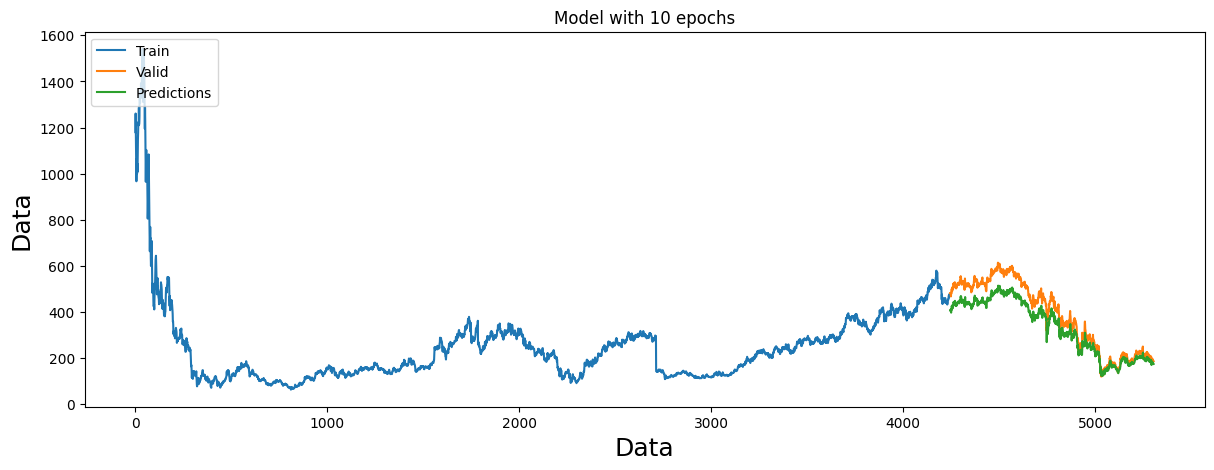

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.title('Model with 10 epochs')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Data', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

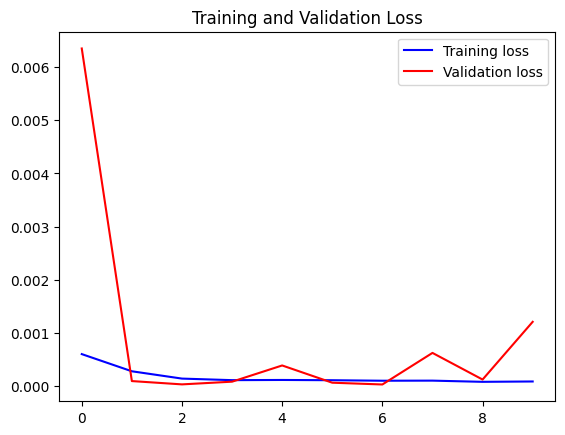

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Real Time Prediction

In [33]:
time_stamp_60 = data[-60:].values

time_stamp_60_scaled = scaler.fit_transform(time_stamp_60)
X_test_temp = []

X_test_temp.append(time_stamp_60_scaled)

X_test_temp = np.array(X_test_temp)

X_test_temp = np.reshape(X_test_temp, (X_test_temp.shape[0], X_test_temp.shape[1], 1))

finalPrediction = model.predict(X_test_temp)

finalPrediction = scaler.inverse_transform(finalPrediction)
print(finalPrediction)

1/1 [==============================] - 0s 17ms/step
[[185.45865]]
